In [252]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import pi

In [253]:
def lorentz(x, y0, amp, cen, wid):
    return y0 + (amp)*(wid/((x-cen)**2 + wid**2))

def read_file(fname,xdata,b=0.1):
    ydata = np.zeros(xdata.size)
    with open(fname) as xas:
        lines = xas.readlines()[1:]
        for l in lines:
            p = float(l.split()[0])
            i = float(l.split()[1])
            ydata += lorentz(xdata,0,i,p,b)
    return ydata

def read_dir_xas(dir_name,xdata,b=0.1,edge = "L",pol = "XYZ"):
    ydata = np.zeros(xdata.size)
    for p in pol:
        filename = dir_name+"/XAS_"+edge+"edge_"+p+".txt"
        ydata += read_file(filename,xdata,b)
    return ydata

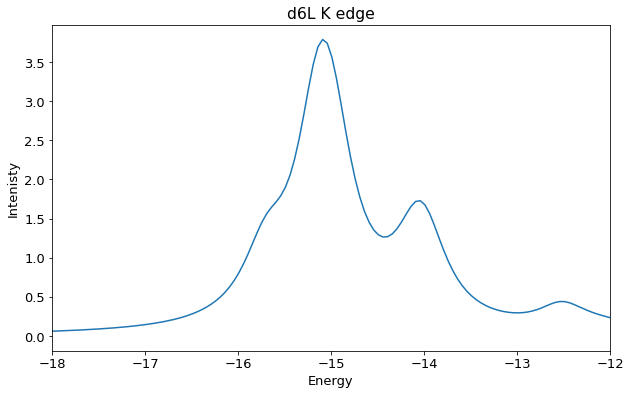

In [372]:
### nedos = 1000
shift = 0
xdata = np.linspace(-25,25,nedos)
edge = "K"
ydata1 = read_dir_xas("./WORK_DIR/LiCoO2/d6L/final",xdata,0.3,edge)
# ydata2 = read_dir_xas("./WORK_DIR/LiCoO2/d6L/test/",xdata,0.5,edge)

# folder_dir = "./WORK_DIR/LiCoO2/d6L/test"
# ydata1 = read_dir_xas(folder_dir,xdata,0.1,edge,"X")
# ydata2 = read_dir_xas(folder_dir,xdata,0.1,edge,"Z")
# ydata3 = read_dir_xas(folder_dir,xdata,0.3,edge)


plt.figure(figsize=(10,6))
plt.rc('font', size=13)   
plt.plot(xdata+shift,ydata1)   
# plt.plot(xdata+shift,ydata2)
# plt.plot(xdata+shift,ydata2,'red',linestyle='--')
# plt.legend(['tpp = 0.3', 'tpp = 0.5'])
plt.title("d6L "+edge+" edge")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
if (edge == 'L'):
    plt.xlim([-10+shift,25+shift])
if (edge == 'K'):
    plt.xlim([-18+shift,-12+shift])

plt.show()

./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.5/XAS_Kedge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.7/XAS_Kedge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.9/XAS_Kedge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=1.1/XAS_Kedge_X.txt


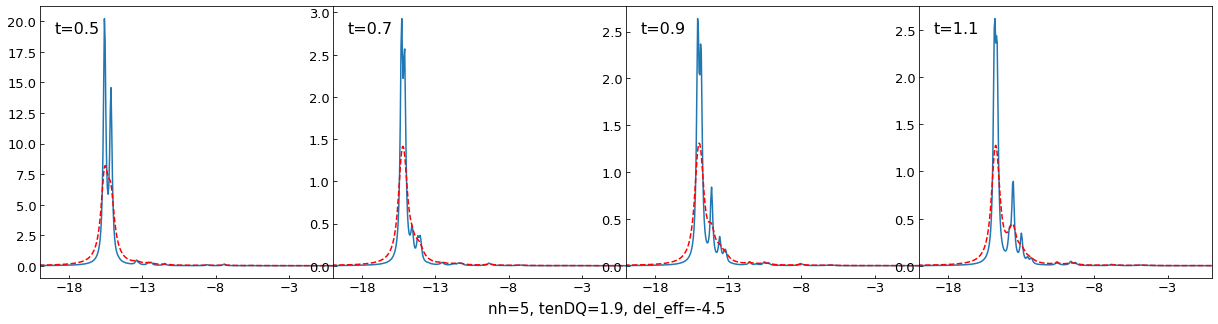

In [15]:
# Plotting d5/d6 LiCoO2
nedos = 1000
nh = 5
tenDQ = 1.9
del_eff = -4.5
edge = 'K'
x = np.linspace(-25,25,nedos)
data_dir = os.path.join("./DATA_DIR","nh="+str(nh),"tenDQ="+f"{tenDQ:.1f}",
                        "del_eff="+f'{del_eff:.1f}')

t_num = len(os.listdir(data_dir))
fig = plt.figure(figsize=(21,5))
gs = fig.add_gridspec(1,t_num,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=False)
for t,t_dir in enumerate(sorted(os.listdir(data_dir))):
    data_file = os.path.join(data_dir,t_dir,'XAS_'+str(edge)+'edge_X.txt')
    print(data_file)
    xas_01 = np.zeros(nedos)
    xas_03 = np.zeros(nedos)
    with open(data_file) as xas:
        lines = xas.readlines()[1:]
        for l in lines:
            p = float(l.split()[0])
            i = float(l.split()[1])
            xas_01 += lorentz(x,0,i,p,0.1)
            xas_03 += lorentz(x,0,i,p,0.3)
    axs[t].plot(x,xas_01)
    axs[t].plot(x,xas_03,color="red",linestyle="dashed")
    if (edge == 'L'):
        axs[t].set_xlim([-10,25])
        axs[t].set_xticks(range(-9, 26, 5))
    if (edge == 'K'):
        axs[t].set_xlim([-20,0])
        axs[t].set_xticks(range(-18, 0, 5))
    axs[t].annotate(t_dir, xy=(0.05, 0.9), xycoords="axes fraction",fontsize=16)
fig.text(0.5,0.04, "nh="+str(nh)+", tenDQ="+f"{tenDQ:.1f}"+", del_eff="+f'{del_eff:.1f}',ha="center",va="center",fontsize=15)
plt.rc('font', size=13)
for t in range(0,t_num):
    axs[t].tick_params(axis="x",direction="in")
    axs[t].tick_params(axis="y",direction="in")

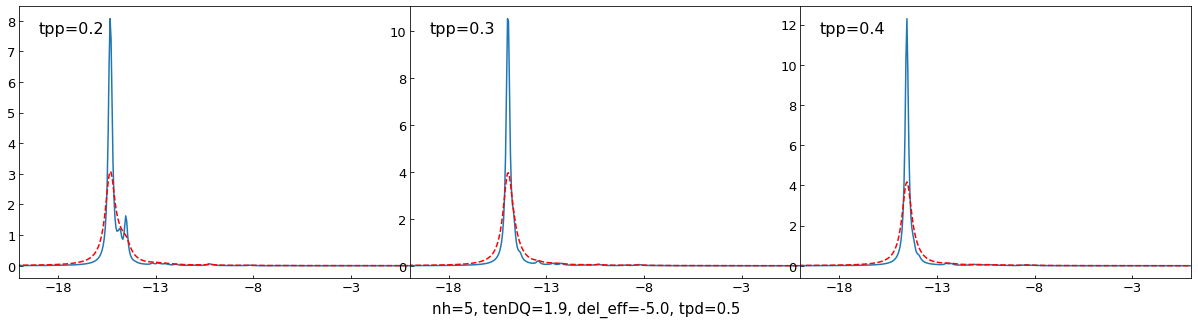

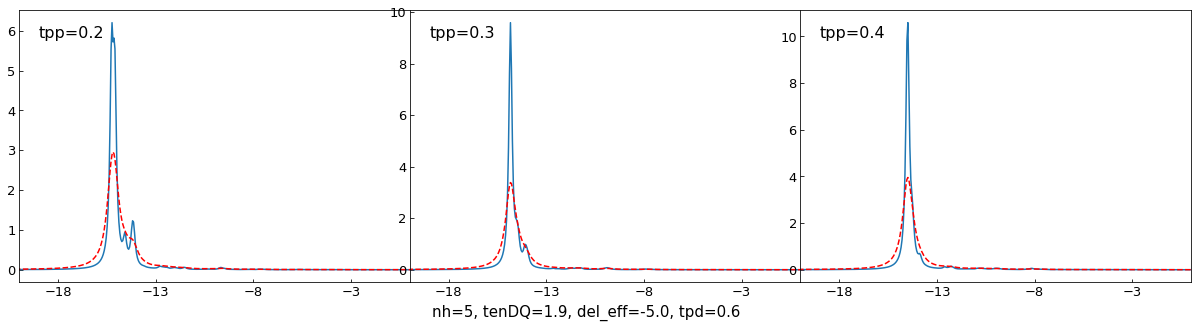

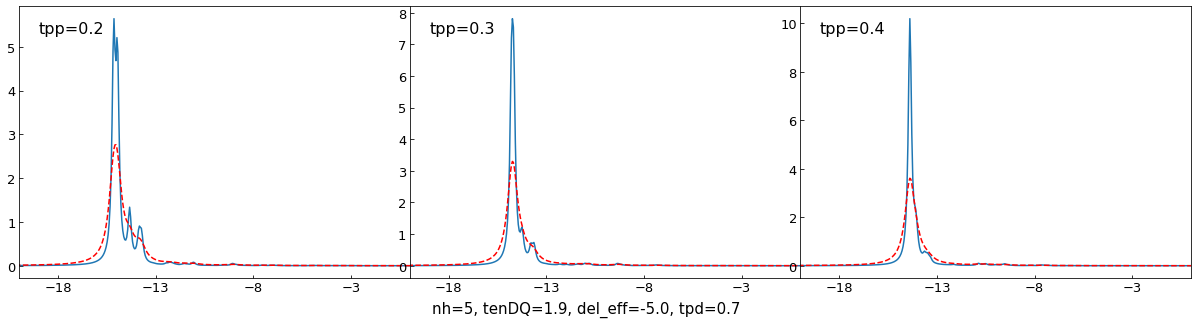

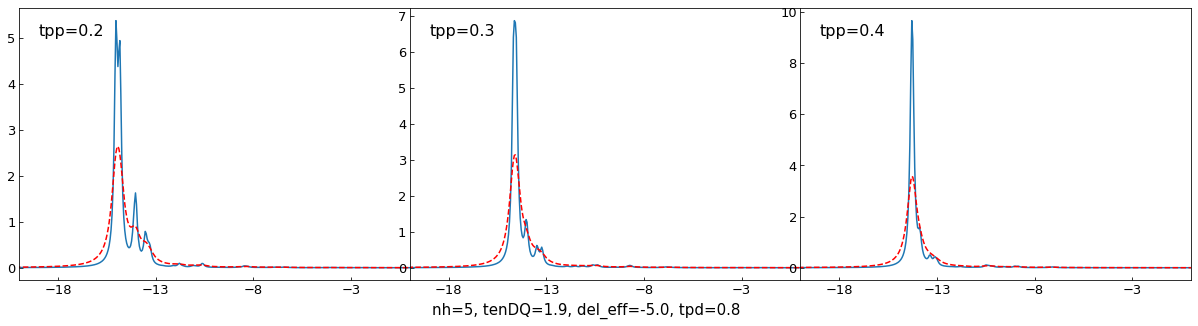

In [176]:
# Plotting d5/d6 LiCoO2
nedos = 1000
del_eff = -5
edge = 'K'
x = np.linspace(-25,25,nedos)
data_dir = os.path.join("./TEST5h","del_eff="+f'{del_eff:.1f}')

for pd, pd_dir in enumerate(sorted(os.listdir(data_dir))):
#     print(pd_dir)
    pd_str = pd_dir
    pd_dir = os.path.join(data_dir,pd_dir)
    t_num = len(os.listdir(pd_dir))
    fig = plt.figure(figsize=(21,5))
    gs = fig.add_gridspec(1,t_num,hspace=0,wspace=0)
    axs = gs.subplots(sharex=False,sharey=False)
    for t,t_dir in enumerate(sorted(os.listdir(pd_dir))):
        data_file_X = os.path.join(pd_dir,t_dir,'XAS_'+str(edge)+'edge_X.txt')
        data_file_Z = os.path.join(pd_dir,t_dir,'XAS_'+str(edge)+'edge_X.txt')
#         print(data_file)
        xas_01 = np.zeros(nedos)
        xas_03 = np.zeros(nedos)
        with open(data_file_X) as xas:
            lines = xas.readlines()[1:]
            for l in lines:
                p = float(l.split()[0])
                i = float(l.split()[1])
                xas_01 += lorentz(x,0,i,p,0.1)
                xas_03 += lorentz(x,0,i,p,0.3)
        with open(data_file_Z) as xas:
            lines = xas.readlines()[1:]
            for l in lines:
                p = float(l.split()[0])
                i = float(l.split()[1])
                xas_01 += lorentz(x,0,i,p,0.1)
                xas_03 += lorentz(x,0,i,p,0.3)
        axs[t].plot(x,xas_01)
        axs[t].plot(x,xas_03,color="red",linestyle="dashed")
        if (edge == 'L'):
            axs[t].set_xlim([-10,25])
            axs[t].set_xticks(range(-9, 26, 5))
        if (edge == 'K'):
            axs[t].set_xlim([-20,0])
            axs[t].set_xticks(range(-18, 0, 5))
        axs[t].annotate(t_dir, xy=(0.05, 0.9), xycoords="axes fraction",fontsize=16)
    fig.text(0.5,0.04, "nh="+str(nh)+", tenDQ="+f"{tenDQ:.1f}"+", del_eff="+f'{del_eff:.1f}'+", "+pd_str,ha="center",va="center",fontsize=15)
    plt.rc('font', size=13)
    for t in range(0,t_num):
        axs[t].tick_params(axis="x",direction="in")
        axs[t].tick_params(axis="y",direction="in")

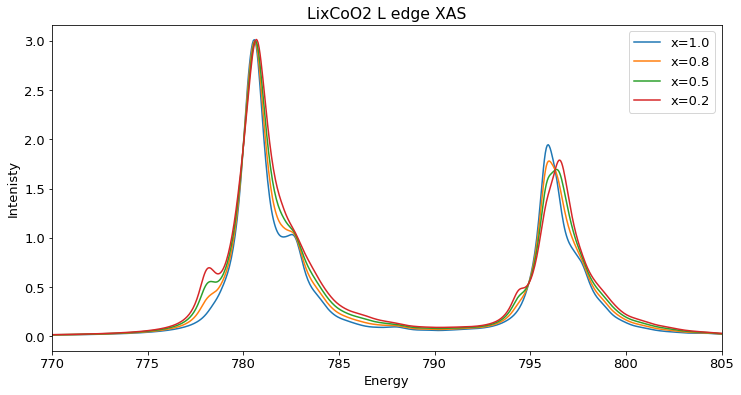

In [360]:
nedos = 1000
shift = 780
x = np.linspace(-25,25,nedos)
plt.figure(figsize=(12,6))
plt.rc('font', size=13)  
edge = "L"
# READ FILES
xas_4h = read_dir_xas("./WORK_DIR/LiCoO2/d6/final-LS",x,0.5,edge)*3
xas_5h = read_dir_xas("./WORK_DIR/LiCoO2/d6L/test",x,0.5,edge)
for i in np.arange(0,1,0.25):
    xas_peak = ((1-i)*xas_4h + i*xas_5h)#*(1+i*0.05)
    plt.plot(x+shift,xas_peak,label="x="+f'{(1-i):.1f}')
    
# plt.gca().get_lines()[1].set_color("green")
# plt.gca().get_lines()[2].set_color("red")
# plt.gca().get_lines()[1].set_linestyle("--")
# plt.gca().get_lines()[2].set_linestyle("--")

plt.title("LixCoO2 L edge XAS")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
plt.legend()
if (edge == 'L'):
    plt.xlim([-10+shift,25+shift])
if (edge == 'K'):
    plt.xlim([-18+shift,-12+shift])

plt.show()